In [108]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import  GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
# Data visualisation
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import r2_score

# Reading in Data

In [2]:
# Reading in Split dataset
sep_data = pd.read_csv('Data_Table_Complete_CSV_CLEAN.csv')
# Printing contents of dataset
sep_data.head()

,Scan_Height_mm,Scan_Height_Layers,mm_per_Layer_Height,Scan_Width_mm,Scan_Width_Layers,mm_per_Layer_Width,Scan_Depth_mm,Scan_Depth_Layers,mm_per_Layer_Depth
0,24.8,55,0.450909,21.7,395,0.054937,20.1,382,0.052618
1,26.3,46,0.571739,18.5,422,0.043839,19.0,379,0.050132
2,25.4,58,0.437931,20.4,409,0.049878,20.0,400,0.050000
3,25.3,36,0.702778,21.6,430,0.050233,18.4,362,0.050829
4,27.8,46,0.604348,21.9,365,0.060000,21.6,372,0.058065


In [3]:
# Reading in Full dataset
full_data = pd.read_csv('Data_Table_Complete_FULL_CSV_CLEAN.csv')
# Printing contents of dataset
full_data.head()

,Scan_Length_mm,Scan_Layers,mm_per_Layer
0,24.8,55,0.450909
1,26.3,46,0.571739
2,25.4,58,0.437931
3,25.3,36,0.702778
4,27.8,46,0.604348


# NN - MLP Regressor

In [28]:
#Setting the value for X and Y
x = full_data[['Scan_Length_mm', 'Scan_Layers']]
y = full_data['mm_per_Layer']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)

In [30]:
sc=StandardScaler()

scaler = sc.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(150,100,50),
                       max_iter = 300,activation = 'relu',
                       solver = 'adam')

mlp_reg.fit(X_train_scaled, y_train)

MLPRegressor(hidden_layer_sizes=(150, 100, 50), max_iter=300)

In [32]:
y_pred = mlp_reg.predict(X_test_scaled)

In [33]:
print(y_pred)

[0.06032808 0.06315156 0.66880677 0.04687685]


In [34]:
print(y_test)

33    0.062229
36    0.067105
4     0.604348
13    0.054937
Name: mm_per_Layer, dtype: float64


In [35]:
prediction_table = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
prediction_table.head()

,Actual,Predicted
33,0.062229,0.060328
36,0.067105,0.063152
4,0.604348,0.668807
13,0.054937,0.046877


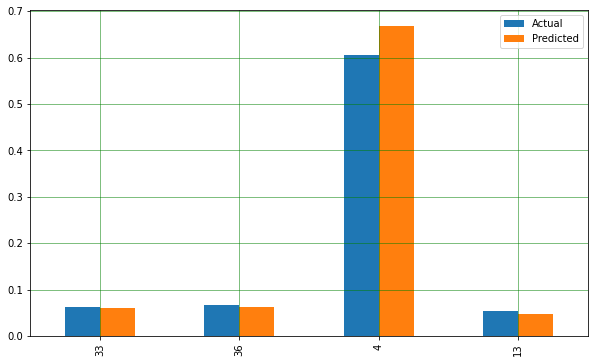

In [36]:
prediction_table.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [37]:
#Model Evaluation
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('R squared: {:.2f}'.format(mlp_reg.score(X_test_scaled,y_test)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, y_pred))

R squared: 98.08
Mean Absolute Error: 0.01959338387359995
Mean Square Error: 0.0010597906925444672
Root Mean Square Error: 0.032554426619808056
Mean Absolute Percentage Error: 0.0857092918131781


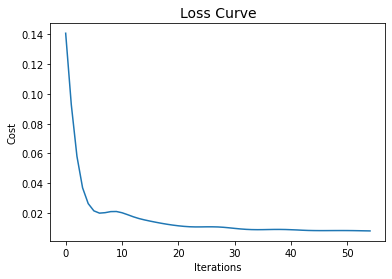

In [38]:
plt.plot(mlp_reg.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [39]:
param_grid = {
    'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
    'max_iter': [50, 200],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [40]:
grid = GridSearchCV(mlp_reg, param_grid, n_jobs= -1, cv=5)
grid.fit(X_train_scaled, y_train)

print(grid.best_params_) 

{'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'adaptive', 'max_iter': 200, 'solver': 'adam'}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [41]:
grid_predictions = grid.predict(X_test_scaled) 

In [42]:
prediction_table2 = pd.DataFrame({'Actual': y_test, 'Predicted': grid_predictions})
prediction_table2.head()

,Actual,Predicted
33,0.062229,0.063956
36,0.067105,0.066555
4,0.604348,0.688193
13,0.054937,0.050975


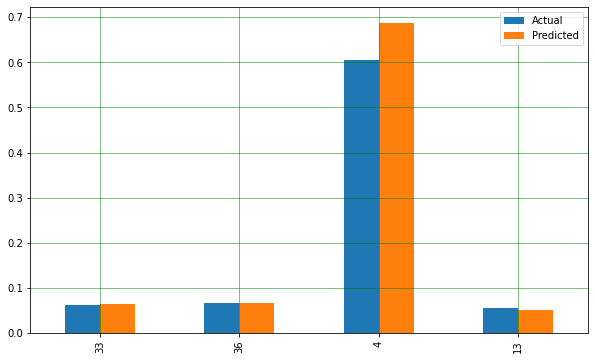

In [43]:
prediction_table2.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [44]:
#Model Evaluation
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('R squared: {:.2f}'.format(mlp_reg.score(X_test_scaled,y_test)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test, y_pred))

R squared: 98.08
Mean Absolute Error: 0.01959338387359995
Mean Square Error: 0.0010597906925444672
Root Mean Square Error: 0.032554426619808056
Mean Absolute Percentage Error: 0.0857092918131781


In [53]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Score', r2_square)
    print('__________________________________')

def cross_val(model):
    pred = cross_val_score(model, x, y, cv=10)
    return pred.mean()

def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [52]:
x = sep_data[['Scan_Height_mm', 'Scan_Height_Layers', 'Scan_Width_mm', 'Scan_Width_Layers', 'Scan_Depth_mm', 'Scan_Depth_Layers']]
y = sep_data[['mm_per_Layer_Height', 'mm_per_Layer_Width', 'mm_per_Layer_Depth']]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [56]:
pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [57]:
model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

In [61]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred)]], # , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square']) #, "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 0.08013841797844841
MSE: 0.02075425832246616
RMSE: 0.14406338300368404
R2 Score -179.21038334444356
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.05170919463162597
MSE: 0.014574907501781293
RMSE: 0.12072658158740888
R2 Score 0.31665576570789006
__________________________________


In [71]:
poly_reg = PolynomialFeatures(degree=2)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

In [72]:
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [73]:
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Polynomail Regression", *evaluate(y_test, test_pred), 0]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Cross Validation'])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:
_____________________________________
MAE: 0.041866519541564055
MSE: 0.005708008118812893
RMSE: 0.07555136080053683
R2 Score -2.9152428438506424
__________________________________
Train set evaluation:
_____________________________________
MAE: 1.6190752442450199e-16
MSE: 9.30428428436167e-32
RMSE: 3.050292491608251e-16
R2 Score 1.0
__________________________________


# ANN





In [136]:
x = sep_data[['Scan_Height_mm', 'Scan_Height_Layers']]
y = sep_data[['mm_per_Layer_Height']]

#x = sep_data[['Scan_Height_mm', 'Scan_Height_Layers', 'Scan_Width_mm', 'Scan_Width_Layers', 'Scan_Depth_mm', 'Scan_Depth_Layers']]
#y = sep_data[['mm_per_Layer_Height', 'mm_per_Layer_Width', 'mm_per_Layer_Depth']]

#Setting the value for X and Y
#x = full_data[['Scan_Length_mm', 'Scan_Layers']]
#y = full_data['mm_per_Layer']

In [137]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)

In [138]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Linear Regression Model

In [139]:
lr = LinearRegression()

In [140]:
lr_model = lr.fit(X_train,y_train)
y_pred = lr_model.predict(X_test)

In [141]:
print(y_pred)

[[1.00848487]
 [0.51700044]]


In [142]:
print(y_test)

    mm_per_Layer_Height
11             1.007407
9              0.497917


## NN Model

In [143]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 64, activation = tf.nn.relu, input_shape = [X_train.shape[1]]),
    tf.keras.layers.Dense(units = 64, activation = tf.nn.relu),
    tf.keras.layers.Dense(units = 1)
    ])

In [144]:
model.compile(loss = 'mse', optimizer = tf.keras.optimizers.RMSprop(0.001), metrics = ['mae','mse'])

In [145]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                192       
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,417
Trainable params: 4,417
Non-trainable params: 0
_________________________________________________________________


In [146]:
history = model.fit(X_train, y_train, epochs = 500, validation_data=(X_test, y_test))

Epoch 1/500
1/1 [==============================] - 1s 747ms/step - loss: 0.4512 - mae: 0.6299 - mse: 0.4512 - val_loss: 0.3994 - val_mae: 0.6020 - val_mse: 0.3994
Epoch 2/500
1/1 [==============================] - 0s 48ms/step - loss: 0.3107 - mae: 0.5011 - mse: 0.3107 - val_loss: 0.3097 - val_mae: 0.5272 - val_mse: 0.3097
Epoch 3/500
1/1 [==============================] - 0s 42ms/step - loss: 0.2442 - mae: 0.4260 - mse: 0.2442 - val_loss: 0.2507 - val_mae: 0.4705 - val_mse: 0.2507
Epoch 4/500
1/1 [==============================] - 0s 31ms/step - loss: 0.2008 - mae: 0.3858 - mse: 0.2008 - val_loss: 0.2076 - val_mae: 0.4247 - val_mse: 0.2076
Epoch 5/500
1/1 [==============================] - 0s 33ms/step - loss: 0.1697 - mae: 0.3505 - mse: 0.1697 - val_loss: 0.1762 - val_mae: 0.3872 - val_mse: 0.1762
Epoch 6/500
1/1 [==============================] - 0s 53ms/step - loss: 0.1459 - mae: 0.3191 - mse: 0.1459 - val_loss: 0.1500 - val_mae: 0.3514 - val_mse: 0.1500
Epoch 7/500
1/1 [==========

In [147]:
hist = pd.DataFrame(history.history)
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse
495,0.000657,0.023573,0.000657,0.001574,0.032220,0.001574
496,0.000671,0.024197,0.000671,0.001396,0.028558,0.001396
497,0.000667,0.023772,0.000667,0.001581,0.032381,0.001581
498,0.000683,0.024422,0.000683,0.001415,0.028521,0.001415
499,0.000678,0.023989,0.000678,0.001686,0.033961,0.001686


In [148]:
y_pred = model.predict(X_test)

In [149]:
pd.DataFrame(list(zip(y_test,y_pred)), columns = ['Actual Values', 'Predicted Values'])

,Actual Values,Predicted Values
0,mm_per_Layer_Height,[0.99652314]


In [150]:
print(y_test)

    mm_per_Layer_Height
11             1.007407
9              0.497917


In [151]:
print(y_pred)

[[0.99652314]
 [0.4408782 ]]


In [152]:
r2_score(y_test, y_pred)

0.9740207878155789

In [153]:
loss, mae, mse = model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 21ms/step - loss: 0.0017 - mae: 0.0340 - mse: 0.0017
